# IHLT Lab 2: Tokenizing and Sentence Similarity

**Authors:** *Zachary Parent ([zachary.alexander.parent](mailto:zachary.alexander.parent@estudiantat.upc.edu)), Carlos Jiménez ([carlos.humberto.jimenez](mailto:carlos.humberto.jimenez@estudiantat.upc.edu))*

### 2024-09-20

**Instructions:**

1. Read all pairs of sentences of the *SMTeuroparl* files of test set within the evaluation framework of the project.

2. Compute their similarities by considering words and Jaccard distance. A distance should be obtained for each pair of sentences (a vector of similarities).

3. Compare the previous results with gold standard by giving the pearson correlation between them. Only a global measure should be obtained from all previous distances.
    ```
    from scipy.stats import pearsonr
    pearsonr(refs, tsts)[0]
    ```


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import nltk
from nltk.metrics.distance import jaccard_distance
import spacy


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Read data
Depending on whether you are running this on Google Colab or locally, set the `BASE_PATH` variable to the appropriate path.

In [3]:
# Read data from Google Drive

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# BASE_PATH = '/content/drive/MyDrive/MASTER AI'

In [4]:
# Read data from local file system

# BASE_PATH = '.'

In [5]:
assert BASE_PATH is not None, "BASE_PATH is not set"

In [6]:
dt = pd.read_csv(f'{BASE_PATH}/test-gold/STS.input.SMTeuroparl.txt',sep='\t',header=None)
dt.head()

,0,1
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi..."


In [7]:
dt.columns = ['s1','s2']
dt.head()

,s1,s2
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi..."


In [8]:
dt['gs'] = pd.read_csv(f'{BASE_PATH}/test-gold/STS.gs.SMTeuroparl.txt',sep='\t',header=None)
dt.head()

,s1,s2,gs
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00


In [9]:
tokenized_dt = dt.copy()
tokenized_dt.loc[:,'s1'] = tokenized_dt.loc[:,'s1'].apply(lambda x: nltk.word_tokenize(x))
tokenized_dt.loc[:,'s2'] = tokenized_dt.loc[:,'s2'].apply(lambda x: nltk.word_tokenize(x))

tokenized_dt.head()


,s1,s2,gs
0,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a...",4.50
1,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha...",5.00
2,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,...",4.25
3,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]",4.50
4,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,...",5.00


In [10]:
tokenized_dt['jaccard'] = tokenized_dt[['s1','s2']].apply(lambda x: jaccard_distance(set(x[0]), set(x[1])), axis=1)
tokenized_dt.head()

/var/folders/0m/k4sjt9f13nq8h9cxt8052ykh0000gn/T/ipykernel_87811/4086384342.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tokenized_dt['jaccard'] = tokenized_dt[['s1','s2']].apply(lambda x: jaccard_distance(set(x[0]), set(x[1])), axis=1)


,s1,s2,gs,jaccard
0,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a...",4.50,0.653846
1,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha...",5.00,0.214286
2,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,...",4.25,0.608696
3,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]",4.50,0.454545
4,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,...",5.00,0.000000


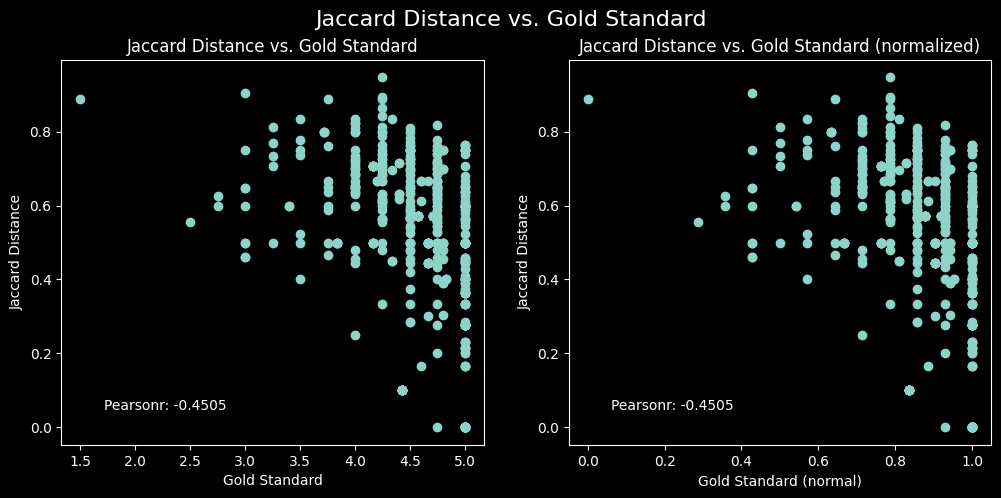

Pearsonr: -0.45049771693186696, pvalue: 2.535645914306656e-24
Pearsonr: -0.45049771693186663, pvalue: 2.5356459143068044e-24


In [11]:
tokenized_dt['gs_normalized'] = np.interp(tokenized_dt['gs'], (tokenized_dt['gs'].min(), tokenized_dt['gs'].max()), (0, 1))
tokenized_dt.head()


fig, axs = plt.subplots(1,2, figsize=(12,5))

pearsonr_gs_jaccard = pearsonr(tokenized_dt['gs'], tokenized_dt['jaccard'])
pearsonr_normalized_gs_jaccard = pearsonr(tokenized_dt['gs_normalized'], tokenized_dt['jaccard'])

axs[0].scatter(tokenized_dt['gs'], tokenized_dt['jaccard'])
axs[0].set_xlabel('Gold Standard')
axs[0].set_ylabel('Jaccard Distance')
axs[0].set_title('Jaccard Distance vs. Gold Standard')
axs[0].text(0.1, 0.1, f"Pearsonr: {pearsonr_gs_jaccard[0]:.4f}", transform=axs[0].transAxes, ha='left', va='center')

axs[1].scatter(tokenized_dt['gs_normalized'], tokenized_dt['jaccard'])
axs[1].set_xlabel('Gold Standard (normal)')
axs[1].set_ylabel('Jaccard Distance')
axs[1].set_title('Jaccard Distance vs. Gold Standard (normalized)')
axs[1].text(0.1, 0.1, f"Pearsonr: {pearsonr_normalized_gs_jaccard[0]:.4f}", transform=axs[1].transAxes, ha='left', va='center')
fig.suptitle('Jaccard Distance vs. Gold Standard', fontsize=16)

plt.show()

print(f"Pearsonr: {pearsonr_gs_jaccard[0]}, pvalue: {pearsonr_gs_jaccard[1]}")
print(f"Pearsonr: {pearsonr_normalized_gs_jaccard[0]}, pvalue: {pearsonr_normalized_gs_jaccard[1]}")

In [12]:
tokenized_dt_without_stopwords = tokenized_dt.copy()

tokenized_dt_without_stopwords.loc[:,'s1'] = tokenized_dt_without_stopwords.loc[:,'s1'].apply(lambda x: [word for word in x if word not in nltk.corpus.stopwords.words('english')])
tokenized_dt_without_stopwords.loc[:,'s2'] = tokenized_dt_without_stopwords.loc[:,'s2'].apply(lambda x: [word for word in x if word not in nltk.corpus.stopwords.words('english')])

tokenized_dt_without_stopwords.head()


,s1,s2,gs,jaccard,gs_normalized
0,"[The, leaders, given, new, chance, let, us, ho...","[The, leaders, benefit, aujourd, ', hui, new, ...",4.50,0.653846,0.857143
1,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, proposing, certain, changes...",5.00,0.214286,1.000000
2,"[Let, remind, allies, include, fervent, suppor...","[I, would, like, remind, among, allies, ,, str...",4.25,0.608696,0.785714
3,"[The, vote, take, place, today, 5.30, p.m, .]","[The, vote, take, place, 5.30pm]",4.50,0.454545,0.857143
4,"[The, fishermen, inactive, ,, tired, disappoin...","[The, fishermen, inactive, ,, tired, disappoin...",5.00,0.000000,1.000000


/var/folders/0m/k4sjt9f13nq8h9cxt8052ykh0000gn/T/ipykernel_87811/3877707010.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tokenized_dt_without_stopwords['jaccard'] = tokenized_dt_without_stopwords[['s1','s2']].apply(lambda x: jaccard_distance(set(x[0]), set(x[1])), axis=1)


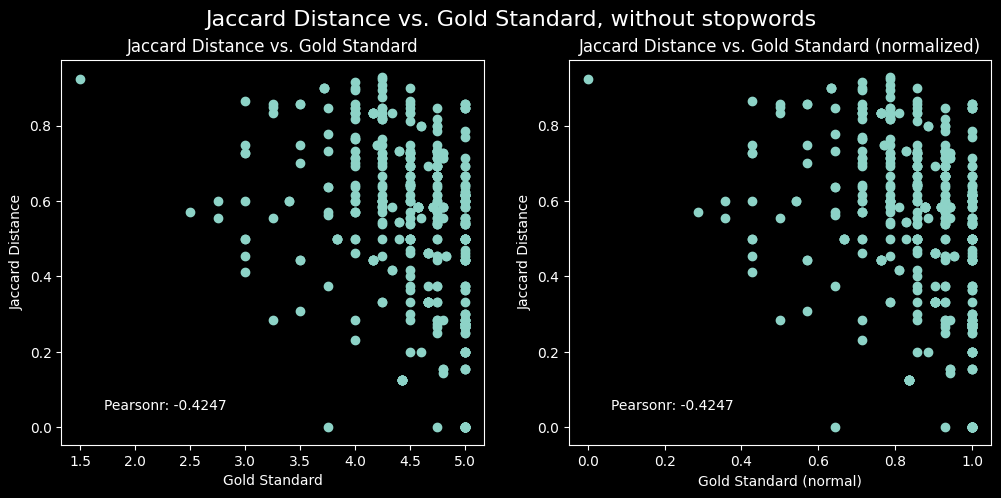

Pearsonr: -0.42468224616360684, pvalue: 1.5957837509387607e-21
Pearsonr: -0.4246822461636062, pvalue: 1.5957837509390197e-21


In [13]:
tokenized_dt_without_stopwords['jaccard'] = tokenized_dt_without_stopwords[['s1','s2']].apply(lambda x: jaccard_distance(set(x[0]), set(x[1])), axis=1)

fig, axs = plt.subplots(1,2, figsize=(12,5))

pearsonr_gs_jaccard = pearsonr(tokenized_dt_without_stopwords['gs'], tokenized_dt_without_stopwords['jaccard'])
pearsonr_normalized_gs_jaccard = pearsonr(tokenized_dt_without_stopwords['gs_normalized'], tokenized_dt_without_stopwords['jaccard'])

axs[0].scatter(tokenized_dt_without_stopwords['gs'], tokenized_dt_without_stopwords['jaccard'])
axs[0].set_xlabel('Gold Standard')
axs[0].set_ylabel('Jaccard Distance')
axs[0].set_title('Jaccard Distance vs. Gold Standard')
axs[0].text(0.1, 0.1, f"Pearsonr: {pearsonr_gs_jaccard[0]:.4f}", transform=axs[0].transAxes, ha='left', va='center')

axs[1].scatter(tokenized_dt_without_stopwords['gs_normalized'], tokenized_dt_without_stopwords['jaccard'])
axs[1].set_xlabel('Gold Standard (normal)')
axs[1].set_ylabel('Jaccard Distance')
axs[1].set_title('Jaccard Distance vs. Gold Standard (normalized)')
axs[1].text(0.1, 0.1, f"Pearsonr: {pearsonr_normalized_gs_jaccard[0]:.4f}", transform=axs[1].transAxes, ha='left', va='center')
fig.suptitle('Jaccard Distance vs. Gold Standard, without stopwords', fontsize=16)

plt.show()

print(f"Pearsonr: {pearsonr_gs_jaccard[0]}, pvalue: {pearsonr_gs_jaccard[1]}")
print(f"Pearsonr: {pearsonr_normalized_gs_jaccard[0]}, pvalue: {pearsonr_normalized_gs_jaccard[1]}")

# Conclusion

We chose to use NLTK's word tokenizer because the API was straightforward and easy to use. We also experimented with Spacy's tokenizer, but found the API to be more complex and less intuitive.

### Jaccard Distance to measure sentence similarity
We computed the Jaccard distance between the sets of words in the sentences. We scored the Jaccard distance with the Gold Standard, using the Pearson correlation with the Gold Standard to determine if our Jaccard distance was a good measure of sentence similarity. We found a Pearson correlation of `-0.4505` with the Gold Standard.

### Normalizing the Gold Standard
We experimented with normalizing the gold standard scores to see if that would affect our Jaccard distance's correlation with the Gold Standard. We found that it did not. The Pearson correlation was still `-0.4505`.

### Removing Stopwords
We also tried using the Jaccard distance with stopwords and without stopwords. We found that the Jaccard distance without stopwords had lower correlation with the Gold Standard. Removing stopwords resulted in a Pearson correlation of `-0.4247` with the Gold Standard.

